#MNIST is a dataset consisting of 70,000 small images of digits handwritten by high school students and employees

This Dataset is Called "Hello World" of Machine Learning

In [ ]:
# scikit-learn provides this dataset

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784',as_frame=False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
X,y=mnist.data,mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X.shape   # 70,000 images with 784 features each

(70000, 784)

In [ ]:
y.shape

(70000,)

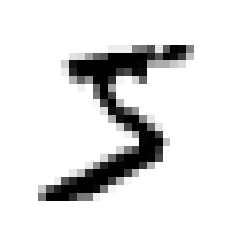

In [ ]:
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image,cmap="binary")
  plt.axis("off")

some_digit=X[0]
plot_digit(some_digit)
plt.show()

In [ ]:
y[0]

'5'

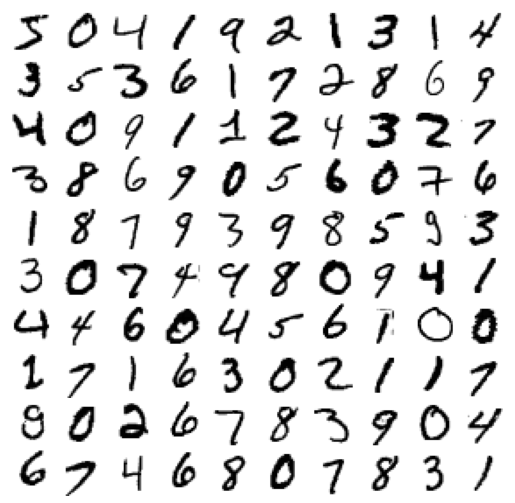

In [ ]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
y_test.shape

(10000,)

<function matplotlib.pyplot.show(close=None, block=None)>

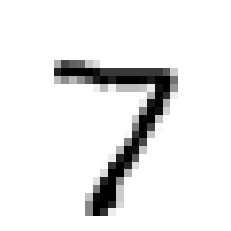

In [ ]:
plot_digit(X_test[0])
plt.show

#Training a binary classifier

In [ ]:
# This classifier capable of distinguishing just two classes "5 and non_5"

y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
sgd_clf.predict([X[1]])

array([False])

In [ ]:
sgd_clf.predict([X[0]])

array([ True])

#Measuring Accuracy using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#Accuracy of negative class i..e is non 5

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Implementin cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_fold=X_train[train_index]
  y_train_fold=y_train_5[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train_5[test_index]

  clone_clf.fit(X_train_fold,y_train_fold)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [ ]:
y_pred[:5]

array([False, False, False, False, False])

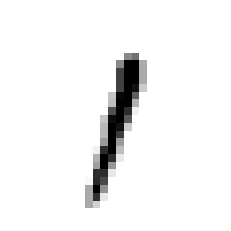

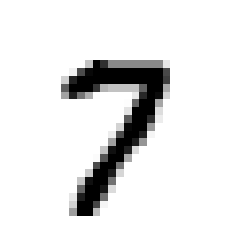

In [ ]:
plot_digit(X_test_fold[0])
plt.show()
plot_digit(X_test_fold[1])
plt.show()

In [ ]:
y_test_fold[:5]

array([False, False, False, False, False])

Accuracy is not a good perfomance measure

#Confusion Metrices

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [ ]:
y_train_pred   # Just like cross_val_score() function, cross_val_predict() function returns predictions for each fold instead of returning evaluation scores

array([ True, False, False, ...,  True, False, False])

In [ ]:
# confusion metrices

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# let's pretend we reached perfection
y_train_perfect=y_train_5
confusion_matrix(y_train_5,y_train_perfect)

array([[54579,     0],
       [    0,  5421]])

#Precision and Recall

In [ ]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred)  #==3530/(3530+687)

0.8370879772350012

In [ ]:
# calculating by formula
cm[1,1]/(cm[1,1]+cm[0,1])

0.8370879772350012

In [ ]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [ ]:
# calculating by formula
cm[1,1]/(cm[1,1]+cm[1,0])

0.6511713705958311

#f-1 score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [ ]:
# calculating by the formula TP/(TP+(FN+FP)/2)

cm[1,1]/(cm[1,1]+(cm[1,0]+cm[0,1])/2)

0.7325171197343847

Finding decision scores and threshold

In [ ]:
y_scores=sgd_clf.decision_function([X[0]])
y_scores

array([2164.22030239])

In [ ]:
threshold=0        #SGDclassifier uses threshold value as 0
y_some=(y_scores>threshold)
y_some                      #it assigns the instances to positive class if decision score is greater than threshold, otherwise to negative class

array([ True])

In [ ]:
threshold=3000
(y_scores>threshold)        # Negative class

array([False])

In [ ]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
y_scores[:10]

array([  1200.93051237, -26883.79202424, -33072.03475406, -15919.5480689 ,
       -20003.53970191, -16652.87731528, -14276.86944263, -23328.13728948,
        -5172.79611432, -13873.5025381 ])

Finding precisions and recalls for each of the scores using precision_recall_curve

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [ ]:
precisions[:20]

array([0.09035   , 0.09035151, 0.09035301, 0.09035452, 0.09035602,
       0.09035753, 0.09035904, 0.09036054, 0.09036205, 0.09036355,
       0.09036506, 0.09036657, 0.09036807, 0.09036958, 0.09037109,
       0.09037259, 0.0903741 , 0.09037561, 0.09037711, 0.09037862])

In [ ]:
recalls[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
thresholds[:20]

array([-146348.56726174, -142300.00705404, -137588.97581744,
       -137155.6264409 , -136254.05856216, -132044.52713504,
       -129170.59413105, -127012.70021086, -126868.79060084,
       -126331.16218305, -124645.65001373, -124540.04945817,
       -124512.64628561, -124071.37735959, -121938.58928823,
       -121244.31587193, -119155.49395644, -118122.9608171 ,
       -116958.41940645, -116233.02109128])

In [ ]:
y_scores[:10]>thresholds[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

#plotting precisions and recalls as functions of threshold

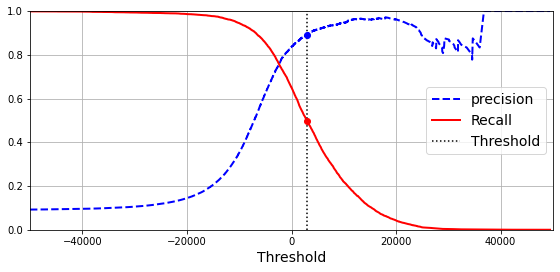

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(thresholds,precisions[:-1],"b--",label="precision",linewidth=2)
plt.plot(thresholds,recalls[:-1],"r-",label="Recall",linewidth=2)
plt.vlines(threshold, 0,1.0,"k","dotted",label="Threshold")


idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "ro")
plt.axis([-50000, 50000, 0, 1])
plt.xlabel("Threshold")
plt.grid()
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

In [ ]:
recalls[idx]

0.4967718133185759

In [ ]:
precisions[idx]

0.8911317008603574

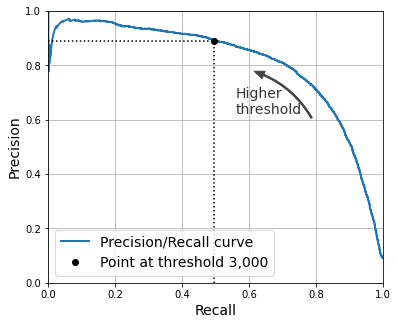

In [ ]:
import matplotlib.patches as patches

plt.figure(figsize=(6,5))
plt.plot(recalls,precisions,linewidth=2,label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

search for the lowest threshold that gives you atleast 90% precision

In [ ]:
idx_for_90_threshold=(precisions>=0.90).argmax()
threshold_for_90_precision=thresholds[idx_for_90_threshold]
threshold_for_90_precision

3370.0194991439557

Finding recall for this threshold

In [ ]:
y_train_pred_90=(y_scores>=threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [ ]:
f1_score(y_train_5,y_train_pred_90)

0.626082771896054

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_train_5,y_train_pred_90)

'              precision    recall  f1-score   support\n\n       False       0.95      0.99      0.97     54579\n        True       0.90      0.48      0.63      5421\n\n    accuracy                           0.95     60000\n   macro avg       0.93      0.74      0.80     60000\nweighted avg       0.95      0.95      0.94     60000\n'

#High-precision classifier is not very useful if its recall is too low!

#The ROC curve [Reciever Operating characteristics]

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [ ]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [ ]:
tpr

array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [ ]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

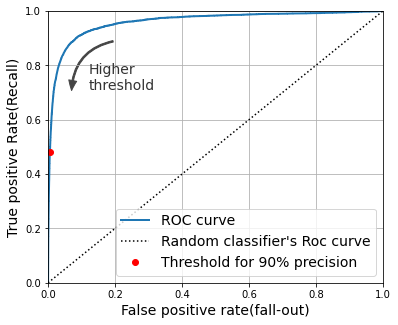

In [ ]:
idx_for_threshold_at_90=(thresholds<=threshold_for_90_precision).argmax()
tpr_90,fpr_90=tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,linewidth=2,label="ROC curve")
plt.plot([0,1],[0,1],"k:",label="Random classifier's Roc curve")
plt.plot([fpr_90],[tpr_90],"ro",label="Threshold for 90% precision")
plt.xlabel("False positive rate(fall-out)")
plt.ylabel("True positive Rate(Recall)")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20,0.89),(0.07,0.70),connectionstyle="arc3,rad=.4",
    arrowstyle="Simple,tail_width=1.5,head_width=8,head_length=10",
    color="#444444"))
plt.text(0.12,0.71,"Higher\nthreshold",color="#333333")
plt.legend(loc="lower right")
plt.grid()
plt.axis([0,1,0,1])
plt.show()


In [ ]:
fpr_90,tpr_90

(0.005295076861063779, 0.4799852425751706)

A Perfect classifier will have a ROC AUC score equal to 1     [AUC-area under curve]

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

#Let's now create a RandomForestClassifier and compare with the SGdClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [ ]:
y_probas_forest       # predict_proba() method returns the probabilities for each instances

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

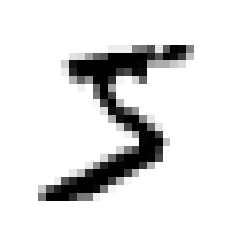

In [ ]:
plot_digit(X_train[0])
plt.show()               # positive probability

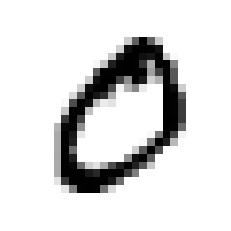

In [ ]:
plot_digit(X_train[1])
plt.show()               # Negative Probability

In [ ]:
y_probas_forest[:,1]

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

The Second column contains the estimated positive probabilities ,So let's pass them to the precision_recall_curve()

In [ ]:
y_scores_forest=y_probas_forest[:,1]
precisions_forest,recalls_forest,thresholds_forest=precision_recall_curve(y_train_5,y_scores_forest)

In [ ]:
precisions_forest

array([0.09035   , 0.15601796, 0.21697018, 0.2782198 , 0.3359375 ,
       0.39168474, 0.4434341 , 0.49221099, 0.53883011, 0.58103448,
       0.62384152, 0.65814579, 0.69354839, 0.72090213, 0.74856904,
       0.77310803, 0.79370733, 0.81468478, 0.83029737, 0.84566529,
       0.8605178 , 0.87232994, 0.88209825, 0.89121268, 0.90208833,
       0.90986159, 0.9178634 , 0.92464178, 0.93120086, 0.93672255,
       0.94127273, 0.94605505, 0.95223107, 0.95618941, 0.95927941,
       0.96257089, 0.96431961, 0.96689629, 0.96939365, 0.97113522,
       0.97292032, 0.975495  , 0.97634069, 0.9787572 , 0.98101519,
       0.98323571, 0.98412375, 0.98566455, 0.98719273, 0.98773389,
       0.98974681, 0.99050833, 0.99129327, 0.99186644, 0.99180858,
       0.99259582, 0.99340804, 0.99378606, 0.99440841, 0.99458239,
       0.99474526, 0.99514451, 0.99555659, 0.99622997, 0.99618594,
       0.99638031, 0.9965661 , 0.99652605, 0.99672462, 0.99692938,
       0.99688393, 0.99762031, 0.9981203 , 0.99809004, 0.99832

In [ ]:
recalls_forest

array([1.        , 1.        , 1.        , 0.99981553, 0.9994466 ,
       0.99926213, 0.99852426, 0.99667958, 0.99575724, 0.99465043,
       0.99335916, 0.99262129, 0.99151448, 0.99059214, 0.9891164 ,
       0.98745619, 0.98653385, 0.9845047 , 0.98376683, 0.98247556,
       0.98099982, 0.97933961, 0.97712599, 0.97472791, 0.97214536,
       0.97011621, 0.96679579, 0.96421324, 0.96126176, 0.95849474,
       0.95498985, 0.95111603, 0.94871795, 0.9461354 , 0.94299945,
       0.93931009, 0.93728094, 0.93211585, 0.92897989, 0.92473713,
       0.92123224, 0.91791182, 0.9134846 , 0.90942631, 0.90555248,
       0.8979893 , 0.89190186, 0.88784357, 0.88157167, 0.87640657,
       0.87253274, 0.86626084, 0.86109574, 0.85482383, 0.8487364 ,
       0.84080428, 0.83397897, 0.82604685, 0.82014388, 0.81276517,
       0.80317285, 0.79394946, 0.78527947, 0.7799299 , 0.77089098,
       0.76166759, 0.74949271, 0.74082273, 0.72975466, 0.71868659,
       0.70817192, 0.69599705, 0.68566685, 0.67478325, 0.65965

In [ ]:
thresholds_forest

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

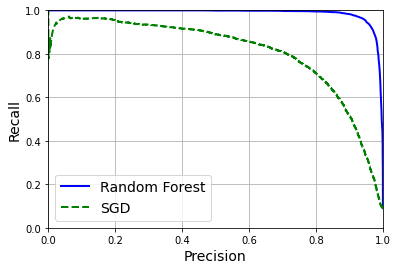

In [ ]:
plt.plot(recalls_forest,precisions_forest,"b-",linewidth=2,label="Random Forest")
plt.plot(recalls,precisions,"g--",linewidth=2,label="SGD")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc="lower left")
plt.show()

#Now we will compare the f1-score and roc_auc_score

We could use cross_val_predict(forest_clf, X_train, y_train_5, cv=3) to compute y_train_pred_forest, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [ ]:
y_train_pred_forest=y_probas_forest[:,1]>=0.5  #positive proba >=50%
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [ ]:
precision_score(y_train_5,y_train_pred_forest)

0.9897468089558485

In [ ]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402

#Multiclass Classification

In [ ]:
# Let's try sklearn.svm.SVC class. We'll only train on first 2000 images or else it will take a very long time to run

In [ ]:
from sklearn.svm import SVC

svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])  # y_train not y_train_5

SVC(random_state=42)

In [ ]:
svm_clf.predict([X[0]])      # since there are multiple class SVM used OvO and trained 45 Binary classifiers and made 45 predictions -one per pair of each class(10 classes)

array(['5'], dtype=object)

In [ ]:
# finding the decision score or probability for each class
svm_scores=svm_clf.decision_function([X[0]])
svm_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [ ]:
class_id=svm_scores.argmax()
class_id

5

##creating OvO and OvR classifiers

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])
ovr_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf=OneVsOneClassifier(SVC(random_state=42))
ovo_clf.fit(X_train[:2000],y_train[:2000])
ovo_clf.predict([X[0]])

array(['5'], dtype=object)

In [ ]:
len(ovo_clf.estimators_)

45

##Training an SGDClassifier on a multiset dataset

In [ ]:
sgd_clf2=SGDClassifier(random_state=42)
sgd_clf2.fit(X_train,y_train)
sgd_clf2.predict([X[0]])

array(['3'], dtype='<U1')

# Wrong prediction. let's evaluate the model using cross_val_score()

In [ ]:
cross_val_score(sgd_clf2,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
# Scaling the inputs for better accuracy using StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype("float64"))
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

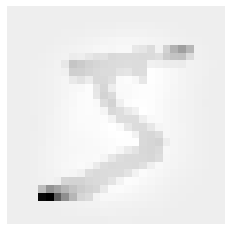

In [ ]:
plot_digit(X_train_scaled[0])

In [ ]:
cross_val_score(sgd_clf2,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

#Error Analysis

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred=cross_val_predict(sgd_clf2,X_train_scaled,y_train,cv=3)

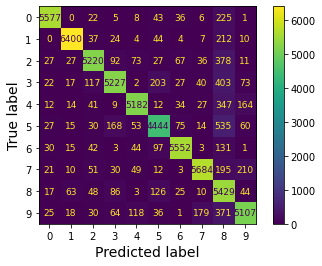

In [ ]:
plt.rc('font',size=9)    # makes text size smaller
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

#Normalizing the confusion matrix

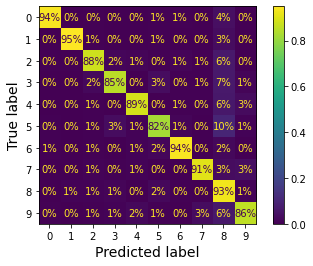

In [ ]:
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="true",values_format=".0%")
plt.show()

#To make errors stand out more

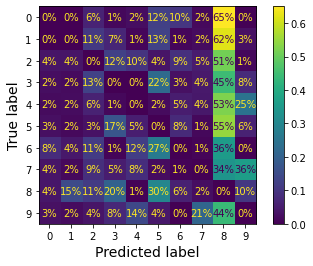

In [ ]:
sample_weight=(y_train_pred!=y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.show()

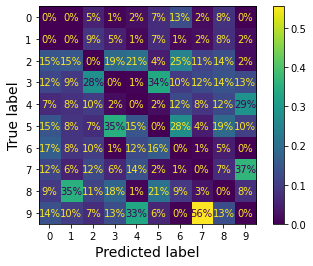

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="pred",values_format=".0%")
plt.show()

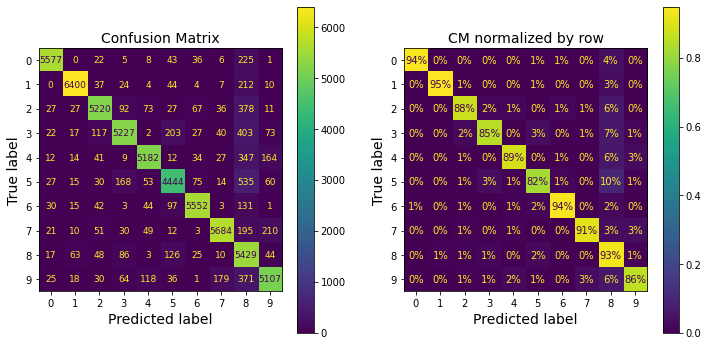

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,ax=axs[0])
axs[0].set_title("Confusion Matrix")
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="true",values_format=".0%",ax=axs[1])
axs[1].set_title("CM normalized by row")
plt.show()

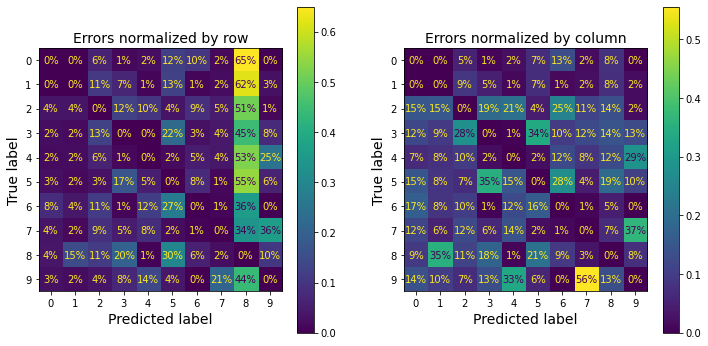

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%",ax=axs[0])
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="pred",values_format=".0%",ax=axs[1])
axs[1].set_title("Errors normalized by column")
plt.show()

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

NameError: ignored

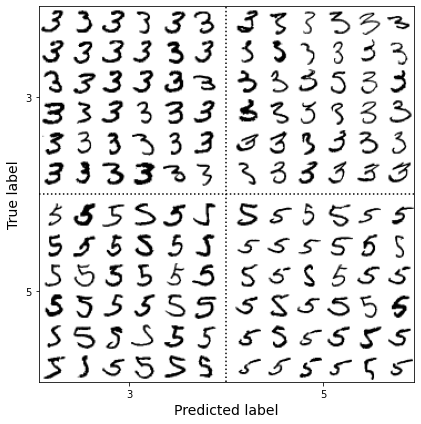

In [ ]:
size = 6
pad = 0.4
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

#Multilabel Classificatioon

 A classification system that outputs multiple binary tags is called multilabel classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>='7')
y_train_large[5000]

True

In [ ]:
y_train_odd=(y_train.astype('int8')%2==1)
y_train_odd

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_multilabel=np.c_[y_train_large,y_train_odd]     # np.c_ concatinates arrays horizantally

In [ ]:
y_multilabel[:5]

array([[False,  True],
       [False, False],
       [False, False],
       [False,  True],
       [ True,  True]])

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([X[0]])

array([[False,  True]])

In [ ]:
knn_clf.predict([X[5000]])    # 7

array([[ True,  True]])

In [ ]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

In [ ]:
f1_score(y_multilabel,y_train_knn_pred,average='macro')

0.976410265560605

In [ ]:
f1_score(y_multilabel,y_train_knn_pred,average='weighted')

0.9778357403921755

In [ ]:
from sklearn.multioutput import ClassifierChain
                                                                # this model displays output in binary(0 and 1)
chain_clf=ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(X_train[:2000],y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([X[0]])

array([[0., 1.]])

In [ ]:
chain_clf.predict([X[5000]])

array([[1., 1.]])

In [ ]:
y_train_chain_pred=cross_val_predict(chain_clf,X_train[:2000],y_multilabel[:2000],cv=3)

In [ ]:
f1_score(y_multilabel[:2000],y_train_chain_pred,average="macro")

0.9228484859061585

In [ ]:
f1_score(y_multilabel[:2000],y_train_chain_pred,average="weighted")

0.9274533464084459

#MultiOutput Classification

In [ ]:
# Simply Adding some noise to the original images by using np.random.randint

np.random.seed(42)
noise=np.random.randint(0,100,(len(X_train),784))
noise

array([[51, 92, 14, ..., 46, 24, 65],
       [ 9, 55, 29, ..., 11, 14, 58],
       [25, 25, 46, ..., 92, 25, 24],
       ...,
       [26, 20, 41, ..., 81, 92, 91],
       [51, 55, 70, ..., 28, 29, 27],
       [ 1,  0, 63, ..., 14,  5,  4]])

In [ ]:
X_train_mod=X_train+noise

In [ ]:
X_train_mod

array([[51., 92., 14., ..., 46., 24., 65.],
       [ 9., 55., 29., ..., 11., 14., 58.],
       [25., 25., 46., ..., 92., 25., 24.],
       ...,
       [26., 20., 41., ..., 81., 92., 91.],
       [51., 55., 70., ..., 28., 29., 27.],
       [ 1.,  0., 63., ..., 14.,  5.,  4.]])

In [ ]:
noise2=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test + noise2

Target values are simply original values

In [ ]:
y_train_mod=X_train
y_test_mod=X_test

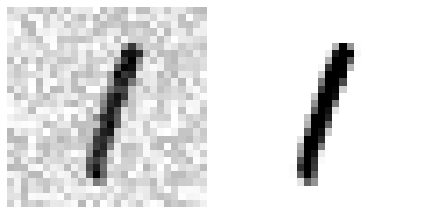

In [ ]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[5])
plt.subplot(122); plot_digit(y_test_mod[5])
save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
knn_clf2=KNeighborsClassifier()
knn_clf2.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf2.predict([X_test_mod[5]])   # passing an image with noise

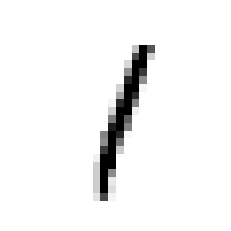

In [ ]:
plot_digit(clean_digit)
plt.show()